In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [4]:
df_test = pd.read_csv('Google_Stock_Price_Test.csv')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [6]:
df_train.describe()

,Open,High,Low
count,1258.000000,1258.000000,1258.000000
mean,533.709833,537.880223,529.007409
std,151.904442,153.008811,150.552807
min,279.120000,281.210000,277.220000
25%,404.115000,406.765000,401.765000
50%,537.470000,540.750000,532.990000
75%,654.922500,662.587500,644.800000
max,816.680000,816.680000,805.140000


In [7]:
train = df_train['Open'].values

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train.reshape(-1,1))

In [10]:
train_size = int(len(train_scaled)*0.8)
train_data = train_scaled[:train_size]
test_data = train_scaled[train_size:]

In [11]:
def create_seq(df_train, seq_length):
    x=[]
    y=[]
    for i in range(len(df_train) - seq_length):
        x.append(df_train[i:i+seq_length])
        y.append(df_train[i+seq_length])
    return np.array(x), np.array(y)

In [12]:
seq_length = 60
x_train, y_train = create_seq(train_data, seq_length)
x_test, y_test = create_seq(test_data, seq_length)

In [15]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
model = Sequential()
model.add(SimpleRNN(units=50, activation='tanh', input_shape=(seq_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2600      
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(x_train, y_train, epochs=2, batch_size=32)

Epoch 1/2
30/30 [==============================] - 5s 22ms/step - loss: 0.0398
Epoch 2/2
30/30 [==============================] - 1s 23ms/step - loss: 0.0014


In [17]:
predicted_price=model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_price)

6/6 [==============================] - 0s 13ms/step


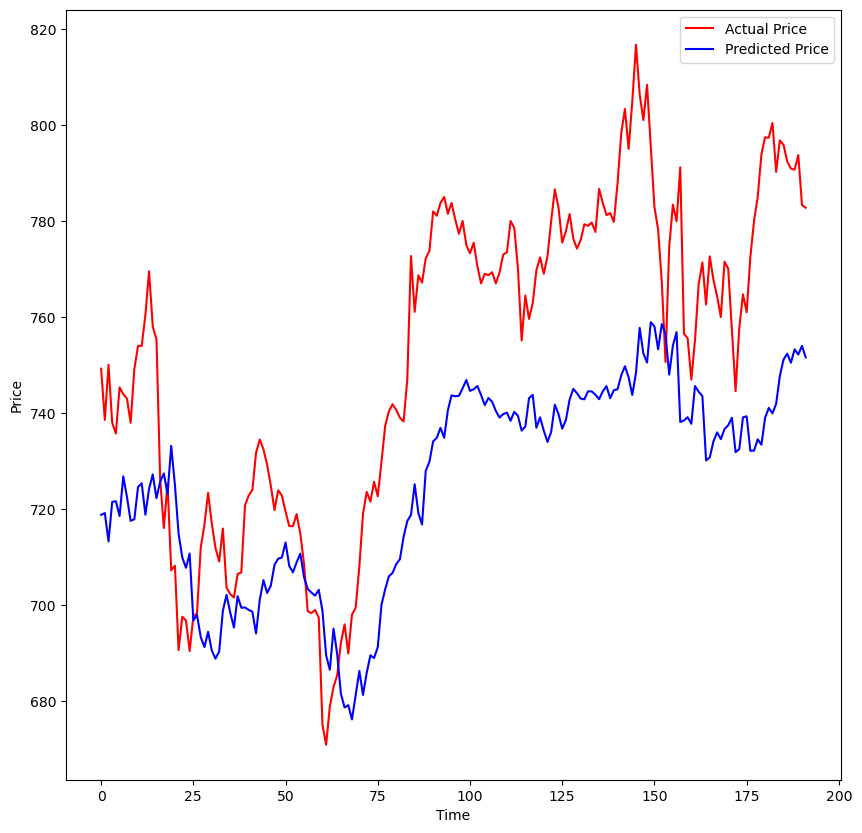

In [19]:
plt.figure(figsize=(10,10))
plt.plot(train[train_size+seq_length:], color='red', label='Actual Price')
plt.plot(predicted_prices, color='blue', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()